In [233]:
import os

In [234]:
os.chdir('/Users/rayasaeed/Desktop/hia322_datacollection/individual_assessment')

In [235]:
import pandas as pd
import numpy as np

a. Demonstrate different ways to convert the horse-colic.txt file to horsecolic.csv. 

In [237]:
#convert .txt to .csv
def convert_txt_to_csv(input_file, output_file):
    df = pd.read_csv(input_file, sep=',', header=None)
    df.to_csv(output_file, index=False, header=False)
    return df

In [238]:
# demonstration of another way to convert .txt to .csv


b. Demonstrate that the csv file can read in Jupyter Notebook, and the dataset remains
the same as the raw dataset

In [240]:
#function usage
input_txt = "horse-colic.txt"  
output_csv = "horsecolic.csv"

df_original = convert_txt_to_csv(input_txt, output_csv)

In [241]:
#reading and verifying the CSV file
def read_and_verify_csv(csv_file):
    #reading data file
    df = pd.read_csv(csv_file, header=None)
    #verify data
    print("Dataset Shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())
    return df

c. Replace the missing values (i.e. with “?”) with a NaN (Not a Number) value in a loaded
dataset using Python. 

In [243]:
#function to replace '?' with NaN
def replace_missing_values(df):
   
    df_cleaned = df.replace('?', np.nan)
    print("\nMissing Value Statistics:")
    print(df_cleaned.isna().sum())
    return df_cleaned

d. Save the latest dataset with NaN as horse-colic-with-NaN.csv and ensure
the data frame’s row number is not saved into the csv file.

In [245]:
#function that saves the cleaned dataset
def save_cleaned_dataset(df, output_file):
    df.to_csv(output_file, index=False, header=False)

In [246]:
input_txt = "horse-colic.txt" #input text file
output_csv = "horsecolic.csv" #output CSV file
nan_csv = "horse-colic-with-NaN.csv" #CSV file with NaN

In [247]:
#convert txt file to csv file
df_original = convert_txt_to_csv(input_txt, output_csv)

In [248]:
#new CSV file
df_csv = read_and_verify_csv(output_csv)

Dataset Shape: (300, 28)

First few rows:
  0   1        2      3    4   5  6  7  8  9   ...     18    19 20    21 22  \
0  2   1   530101  38.50   66  28  3  3  ?  2  ...  45.00  8.40  ?     ?  2   
1  1   1   534817   39.2   88  20  ?  ?  4  1  ...     50    85  2     2  3   
2  2   1   530334  38.30   40  24  1  1  3  1  ...  33.00  6.70  ?     ?  1   
3  1   9  5290409  39.10  164  84  4  1  6  2  ...  48.00  7.20  3  5.30  2   
4  2   1   530255  37.30  104  35  ?  ?  6  2  ...  74.00  7.40  ?     ?  2   

  23     24 25 26 27  
0  2  11300  0  0  2  
1  2   2208  0  0  2  
2  2      0  0  0  1  
3  1   2208  0  0  1  
4  2   4300  0  0  2  

[5 rows x 28 columns]


In [249]:
#replacing '?' with NaN and missing value statistics
df_cleaned = replace_missing_values(df_csv)


Missing Value Statistics:
0       1
1       0
2       0
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
23      0
24      0
25      0
26      0
27      0
dtype: int64


In [250]:
#save cleaned dataset
save_cleaned_dataset(df_cleaned, nan_csv)

In [251]:
print(f" Original CSV file: {output_csv}")
print(f" Cleaned CSV file with NaN values: {nan_csv}")

 Original CSV file: horsecolic.csv
 Cleaned CSV file with NaN values: horse-colic-with-NaN.csv


e. Rename the header by following the
description file (horse-colic.names) with not more than 10 characters in the
header title

In [253]:
#list of column names
column_names = [
    "surgery", "age", "hos_num", "rect_temp", "pulse", "resp_rate", "ext_temp",
    "periph_p", "muc_mem", "cap_ref", "pain", "perist", "abd_dist", "nasog_tub",
    "nasog_ref", "nasog_ph", "rect_fec", "abd_cond", "pack_cell", "tot_prot",
    "ab_appr", "ab_prot", "outcome", "surg_les", "les_site", "les_type",
    "les_subt", "path_data"
]

#setting column names
df = pd.read_csv(nan_csv, sep=',', header=None)
df.columns = column_names

f. Save the latest dataset with header title as horse-colic-with-title.csv and
ensure the data frame’s row number is not saved into the csv file.

In [255]:
#save as new CSV
df.to_csv("horse-colic-with-title.csv", index=False)

g. Load the horse-colic-with-title.csv file and display a list of total NaN at
each column in the dataset. 

In [256]:
#display total NaN counts from dataset
titled_csv = "horse-colic-with-title.csv"

#loading CSV file
df = pd.read_csv(titled_csv)

#displaying total NaN counts for each column
print("Total NaN count per column:")
print(df.isna().sum())

Total NaN count per column:
surgery        1
age            0
hos_num        0
rect_temp     60
pulse         24
resp_rate     58
ext_temp      56
periph_p      69
muc_mem       47
cap_ref       32
pain          55
perist        44
abd_dist      56
nasog_tub    104
nasog_ref    106
nasog_ph     247
rect_fec     102
abd_cond     118
pack_cell     29
tot_prot      33
ab_appr      165
ab_prot      198
outcome        1
surg_les       0
les_site       0
les_type       0
les_subt       0
path_data      0
dtype: int64


h. Visualise the total NaN at each column in the dataset with a bar chart and set the
colour to ‘blue’ using Matplotlib library

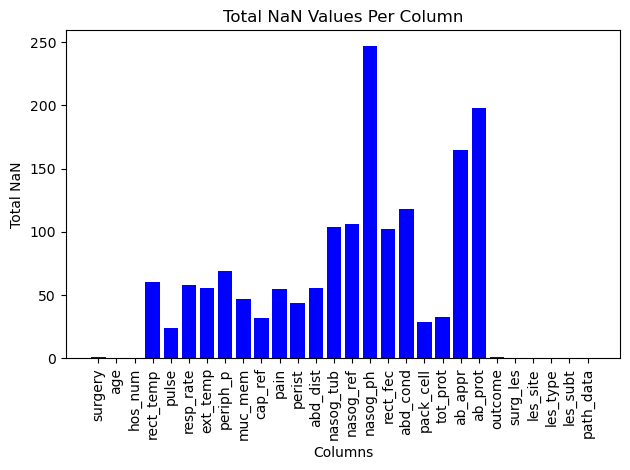

In [257]:
titled_csv = "horse-colic-with-title.csv"
df = pd.read_csv(titled_csv)

#total NaN counts
nan_counts = df.isna().sum()

#bar chart of NaN counts
plt.bar(nan_counts.index, nan_counts.values, color='blue')
plt.xlabel("Columns")
plt.ylabel("Total NaN")
plt.title("Total NaN Values Per Column")
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

i. Retrieve the datatypes (e.g. float, integer, object, string etc.) for the dataset

In [258]:
#load the dataset
titled_csv = "horse-colic-with-title.csv"
df = pd.read_csv(titled_csv)

#display datatypes of each column
print("Datatypes of each column:")
print(df.dtypes)

Datatypes of each column:
surgery      float64
age            int64
hos_num        int64
rect_temp    float64
pulse        float64
resp_rate    float64
ext_temp     float64
periph_p     float64
muc_mem      float64
cap_ref      float64
pain         float64
perist       float64
abd_dist     float64
nasog_tub    float64
nasog_ref    float64
nasog_ph     float64
rect_fec     float64
abd_cond     float64
pack_cell    float64
tot_prot     float64
ab_appr      float64
ab_prot      float64
outcome      float64
surg_les       int64
les_site       int64
les_type       int64
les_subt       int64
path_data      int64
dtype: object


j. In this dataset, will it be a good idea to delete/drop out the NaN rows?

It is not a good idea in this case to drop out these rows as the data set contains information about only 300 horses and the dataset is therefore considered small. As there area  significant number of missing values in the data, deleting the NaN rows would lead to bias in the data.


k. Read and evaluate the following code in Figure 1. What method is the code using to
reduce the missing value from 1605 to 0? Justify your answer.

- This section uses 'mean imputation' to reduce the missing values. Initially, the missing values (which are represented in the sataset by '?') are replaced with NaN to allow data processing.
- This technique allows the replacement of missins values by caluclating the mean of the data already pressent in the same column. In this way, the total number of missing values is reduced from 1605 to 0.

l. Fill out the inline comments marked with hashtags ‘#’ in lines 8, 11, 17, 20, 22 and 26.
Include the missing codes in lines 5 and 6. 

In [261]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

dataframe = read_csv("horsecolic.csv", header=None)  #load the dataset
dataframe = dataframe.replace('?', float('nan')).apply(pd.to_numeric, errors='coerce')  #replace '?' and convert to numeric

#extracting the data values (numpy array format) from the original pandas DataFrame
data = dataframe.values

#separating variables: input (X) from target (y), all columns will be selected except column 23
totalCol = data.shape[1]
ix = [i for i in range(totalCol) if i != 23] 
X = data[:,ix]
y = data[:, 23] 

#printing of the total number of missing values in the dataset before imputation
print('Missing: %d' % sum(isnan(X).flatten()))

#creating an imputer to fill missing values with the column mean
imputer = SimpleImputer(strategy='mean')
#the imputer is made to fit the input dataset to calculate column means and missing values are replaced with the calculated column mean
imputer.fit(X)
Xtrans = imputer.transform(X)

#after imputing: counting and printing of the number of missing values in the dataset now (should be 0)
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0
